In [3]:
import numpy as np
import tensorflow as tf

# 입력이미지(Feature Map)
# (이미지 개수, 이미지 height, 이미지 width, channel)
# (1, 4, 4, 1)
image = np.array([[[[13],[20],[30],[0]],
                   [[8],[12],[3],[0]],
                   [[34],[70],[33],[5]],
                   [[111],[80],[10],[23]]]], dtype=np.float32)
print(image.shape)   # (1, 4, 4, 1)

# ksize = 2
# stride = 2
pooling = tf.nn.max_pool(image,
                         ksize=[1,2,2,1],
                         strides=[1,2,2,1],
                         padding='VALID')
sess = tf.Session()
result = sess.run(pooling)
print('Pooling한 결과 : \n{}'.format(result))
print(result.shape) # (1, 2, 2, 1)

(1, 4, 4, 1)
Pooling한 결과 : 
[[[[ 20.]
   [ 30.]]

  [[111.]
   [ 33.]]]]
(1, 2, 2, 1)


(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(1, 427, 638, 1)
(1, 142, 212, 1)


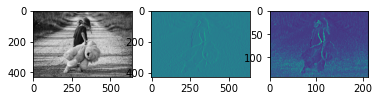

In [16]:
# Gray-scale 이미지를 이용해서 Convolution처리와 Pooling처리를 해 보아요!
# %reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
fig_1 = fig.add_subplot(1,3,1)
fig_2 = fig.add_subplot(1,3,2)
fig_3 = fig.add_subplot(1,3,3)

ori_image = img.imread('./image/girl-teddy.jpg')
fig_1.imshow(ori_image)
print(ori_image.shape)   # (429, 640, 3)

# 해당 이미지를 convolution 처리를 해야 해요! => 4차원 데이터로 표현
# ( 이미지 개수, height, width, color(channel) )
input_image = ori_image.reshape((1,) + ori_image.shape)

print(input_image.shape)   # (1, 429, 640, 3)

channel_1_input_image = input_image[:,:,:,0:1]
channel_1_input_image = channel_1_input_image.astype(np.float32)
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter (filter의 height, filter width, filter channel, filter 개수)
# (3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]], dtype=np.float32)
# stride : 1
# padding : VALID
sess = tf.Session()
conv2d = tf.nn.conv2d(channel_1_input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID')
conv2d_result = sess.run(conv2d)
print(conv2d_result.shape)  # (1, 427, 638, 1)
t_img = conv2d_result[0,:,:,:]
fig_2.imshow(t_img)

## pooling 처리 ##

# ksize = 3
# stride = 3
pooling = tf.nn.max_pool(conv2d_result,
                         ksize=[1,3,3,1],
                         strides=[1,3,3,1],
                         padding='VALID')

pooling_result = sess.run(pooling)
print(pooling_result.shape)  # (1, 142, 212, 1)
p_img = pooling_result[0,:,:,:]

fig_3.imshow(p_img)
plt.show()

(42000, 784)
(28, 28)
(1, 28, 28, 1)
(3, 3, 1, 4)
(1, 13, 13, 4)
(4, 13, 13, 1)


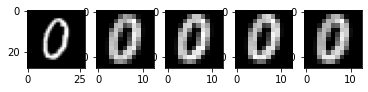

In [29]:
# %reset
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()

fig_list = list() # 이 안에 각각의 subplot을 저장할 꺼예요!

for i in range(5):
    fig_list.append(fig.add_subplot(1,5,i+1))
    
# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

img_data = df.drop('label', axis=1, inplace=False).values
print(img_data.shape)

# 샘플로 사용할 이미지를 하나 선택해보아요!
ori_image = img_data[5:6].reshape(28,28)
fig_list[0].imshow(ori_image, cmap='gray')

# Convolution 처리
# 입력이미지 : (1, 28, 28, 1) 형태가 되어야 해요
print(ori_image.shape)  # (28, 28)
input_image = ori_image.reshape((1,) + ori_image.shape + (1,))
print(input_image.shape)  # (1, 28, 28, 1)
input_image = input_image.astype(np.float32)

# filter(kernel) => (3,3,1,4)
weight = np.random.rand(3,3,1,4)
print(weight.shape)  # (3, 3, 1, 4)

# stride : 1
# padding : VALID

sess = tf.Session()

conv2d = tf.nn.conv2d(input_image,
                      weight,
                      strides=[1,1,1,1],
                      padding='VALID')
conv2d_result = sess.run(conv2d)

## ReLU (Rectified Linear Unit) ## 
relu_ = tf.nn.relu(conv2d_result)
relu_result = sess.run(relu_) 

## pooling 처리 ##
# ksize = stride = 2
pooling = tf.nn.max_pool(relu_result,
                         ksize=[1,2,2,1],
                         strides=[1,2,2,1],
                         padding='VALID')
pooling_result = sess.run(pooling)

print(pooling_result.shape)  # (1, 13, 13, 4)
# (4, 13, 13, 1)

i = np.swapaxes(pooling_result,0,3)  # (4, 13, 13, 1)
print(i.shape)

for filter_idx, t_img in enumerate(i):
    fig_list[filter_idx+1].imshow(t_img, cmap='gray')
    